In [2]:
import numpy as np
import matplotlib.pyplot as plt

def readraffile(path):                      #读取raf文件，返回文件的二进制数据，形式为bytes
    with open(path, 'rb') as file:
        file_data = file.read()
    return file_data

def show_data(data,num_space=4,num_line=32):#传入的是文件的二进制数据，以16进制展示
    data=data.hex()
    for i in range(len(data)):
        print(data[i], end='')
        if i % num_space == num_space-1:
            print(' ',end='')
        if i % num_line == num_line-1:
            print()

def datatrans(data):                         #传入的是文件的二进制数据，进行示波器和人性的数据转换
    data=bytearray(data)
    for i in range(0,len(data),2):
        data[i],data[i+1]=data[i+1],data[i]
        # print('===')
    return data

def datalist_value(data):                     #传入的是文件的二进制数据，返回四个'字'组成的有效数据对应的十六进制整数构成的list，并且去掉了首个表示文件大小的字
    value=[]
    for i in range(2,len(data),2):
        value.append(data[i+1]+data[i]*16**2)
        # print('===')
    return value

def list_value_hex(value_list):              #传入的是list，其元素是整数，将其转换为四位16进制字符串
    value_hex=[]
    for i in value_list:
        value_hex.append(f'{i:04X}')
    return value_hex

def hex_hex_value(value_hex):                #传入的是list，其元素是四位16进制字符串，将其转换为整数
    value_list=[]
    for i in value_hex:
        value_list.append(int(i,16))
    return value_list

def writeraffile(value_list,path):           #传入的是整数列表，以16进制写入目标文件，不用管首位表示文件大小的那个，我已经帮你补进去了
    data=[0x00,0x80]                         #整数列表是一个长度是0x3fff，每位是0x0000到0x3fff之间的整数
    for i in value_list:
        valuehex=f'{i:04x}'
        data.append(int(valuehex[2:4],16))
        data.append(int(valuehex[0:2],16))
    mybet=bytearray(data)
    print('写入的数据为',mybet)
    with open(path, "wb") as file:
        file.write(mybet)


def plot_scatter(x, title='Scatter Plot', x_label='X-axis', y_label='Y-axis'):
    # 绘制散点图
    plt.scatter(np.arange(len(x)),x,marker='o', s=0.1)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    # # 设置X轴和Y轴范围
    # plt.xlim(0, 2000)  # 设置X轴范围
    # plt.ylim(0, 2000)  # 设置Y轴范围
    plt.show()

def plot_line(x, title='Scatter Plot', x_label='X-axis', y_label='Y-axis'):
    # 绘制散点图
    plt.plot(np.arange(len(x)),x, label='数据线', color='blue')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    # 设置X轴和Y轴范围
    # plt.xlim(0, 1200)  # 设置X轴范围
    # plt.ylim(0, 1200)  # 设置Y轴范围
    plt.show()




In [3]:
# 功能验证代码块
data=readraffile('8层阶梯波形.raf')
data=datatrans(data)
value=datalist_value(data)
writeraffile(value,'8层阶梯波形仿2.raf')
# show_data(data)
# data
data1=readraffile('8层阶梯波形.raf')
data2=readraffile('8层阶梯波形仿2.raf')
data1==data2

写入的数据为 bytearray(b'\x00\x80\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\

True

# 示波器和16进制文件读取

* 16进制文件读取中中每个"字"都是都是16位的，是'0,1,...,e,f'
* 示波器要求每两个字组成一个数据点，每两个数据点组成一个数据，其中前面个数据点表示低位，后面两个数据点表示高位
* 示波器中每一个数据最大是3FFF
* 示波器要求第一个数据用于存储数据点的个数（以16进制数记录）

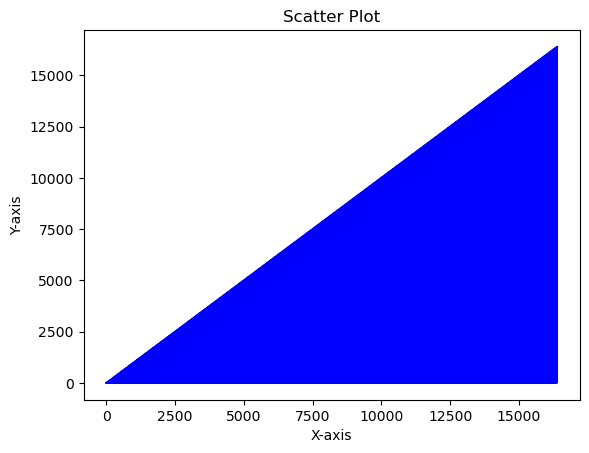

写入的数据为 bytearray(b'\x00\x80\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x10\x00\x10\x00\x10\x00\x10\x00\x10\x00\x10\x00\x10\x00\x10\x00\x10\x00\x10\x00\x10\x00\x10\x00\x10\x00\x10\x00\x10\x00\x10\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x000\x000\x000\x000\x000\x000\x000\x000\x000\x000\x000\x000\x000\x000\x000\x000\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00P\x00P\x00P\x00P\x00P\x00P\x00P\x00P\x00P\x00P\x00P\x00P\x00P\x00P\x00P\x00P\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00p\x00p\x00p\x00p\x00p\x00p\x00p\x00p\x00p\x00p\x00p\x00p\x00p\x00p\x00p\x00p\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\

In [14]:
max=int('0x3fff',16)
lenth=int('0x3fff',16)
N=512*2
dx=int(lenth/N)+1
dy=max/(N-1)
newvalue=[]
for i in range(lenth):
    i_=i//dx
    if i_%2==0:
        # print('000')
        newvalue.append(0)
    else:
        newvalue.append(int(i_*dy))

# plot_scatter(newvalue)
plot_line(newvalue)

writeraffile(newvalue,'512steps.raf')
